In [2]:
import pandas as pd
import numpy as nm
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score,LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/fetal_health.csv')
df


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


# **MOdel Validation**

# **Train Test Split**

In [5]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
x

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20,random_state = 42)

# **LogisticRegression**

In [11]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)
ypred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1., 1., 1., 1., 1., 3., 1., 3., 1., 1., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 3., 3., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 3., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1.,
       1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 2., 2., 1., 2., 1.,
       1., 1., 1., 1., 3., 1., 3., 1., 2., 2., 1., 2., 1., 3., 1., 1., 2.,
       3., 1., 1., 1., 1., 3., 3., 3., 1., 2., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 2., 1., 3., 1., 3., 1., 1., 2., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 2., 2., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1233,125.0,0.000,0.000,0.008,0.000,0.0,0.000,32.0,1.1,3.0,...,51.0,96.0,147.0,4.0,0.0,126.0,125.0,127.0,2.0,0.0
480,140.0,0.000,0.000,0.001,0.000,0.0,0.000,60.0,0.8,32.0,...,120.0,79.0,199.0,9.0,0.0,141.0,141.0,142.0,3.0,0.0
1111,122.0,0.000,0.000,0.000,0.001,0.0,0.000,20.0,1.8,0.0,...,39.0,103.0,142.0,1.0,0.0,120.0,119.0,121.0,3.0,0.0
1303,137.0,0.005,0.000,0.005,0.002,0.0,0.000,36.0,0.9,0.0,...,63.0,115.0,178.0,4.0,0.0,148.0,148.0,149.0,9.0,0.0
861,142.0,0.003,0.000,0.004,0.000,0.0,0.000,46.0,0.7,27.0,...,26.0,133.0,159.0,1.0,0.0,150.0,148.0,150.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,130.0,0.009,0.001,0.004,0.001,0.0,0.000,52.0,1.3,0.0,...,99.0,73.0,172.0,6.0,0.0,144.0,141.0,144.0,16.0,1.0
1095,123.0,0.012,0.000,0.002,0.000,0.0,0.000,22.0,2.2,0.0,...,52.0,100.0,152.0,2.0,0.0,131.0,132.0,133.0,4.0,0.0
1130,122.0,0.005,0.000,0.004,0.005,0.0,0.000,20.0,2.6,0.0,...,98.0,60.0,158.0,6.0,0.0,131.0,121.0,126.0,31.0,0.0
1294,115.0,0.003,0.000,0.008,0.002,0.0,0.001,24.0,1.6,0.0,...,108.0,71.0,179.0,3.0,2.0,133.0,122.0,129.0,45.0,0.0


In [19]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(ytest,ypred))
print(f"Test Accuracy : {lg.score(xtrain,ytrain)}\ntrain accuracy : {lg.score(xtest,ytest)}")

              precision    recall  f1-score   support

         1.0       0.90      0.95      0.93       333
         2.0       0.70      0.47      0.56        64
         3.0       0.73      0.76      0.75        29

    accuracy                           0.87       426
   macro avg       0.78      0.73      0.74       426
weighted avg       0.86      0.87      0.86       426

Test Accuracy : 0.8611764705882353
train accuracy : 0.8685446009389671


# **DecisionTreeClassifier**

In [22]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print(classification_report(ytest,ypred))
print(f"Test Accuracy : {dt.score(xtrain,ytrain)}\ntrain accuracy : {dt.score(xtest,ytest)}")

              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       333
         2.0       0.76      0.84      0.80        64
         3.0       0.90      0.93      0.92        29

    accuracy                           0.92       426
   macro avg       0.87      0.90      0.89       426
weighted avg       0.93      0.92      0.93       426

Test Accuracy : 1.0
train accuracy : 0.9248826291079812


# **2.KFold cross validation**

# **LogisticRegression**

In [24]:
kf = KFold(n_splits = 10) #no of folds
kf_scores = cross_val_score(LogisticRegression(),x,y,cv=kf)
kf_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.8028169 , 0.62910798, 0.76525822, 0.77934272, 0.98122066,
       0.99061033, 0.85849057, 0.89150943, 0.99056604, 0.73113208])

In [25]:
kf_scores.mean() #accuracy of model

0.8420054920719284

# **DecisionTreeClassifier**

In [27]:
KF = KFold(n_splits = 10)
kf_scores = cross_val_score(DecisionTreeClassifier(),x,y,cv = KF)
kf_scores

array([0.83568075, 0.87793427, 0.87793427, 0.84976526, 0.97183099,
       0.99061033, 0.8254717 , 0.84433962, 0.87735849, 0.69339623])

In [28]:
kf_scores.mean()

0.864432190628045

# **LeaveOneOut**

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Pima.csv', index_col=0)
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
x = df.iloc[:,:-1]
y = df["class"]

In [31]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

# **LogisticRegression**

In [32]:
lv = LeaveOneOut()
lv_scores = cross_val_score(LogisticRegression(),x,y,cv = lv)
lv_scores

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

array([1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 1.

<Axes: ylabel='count'>

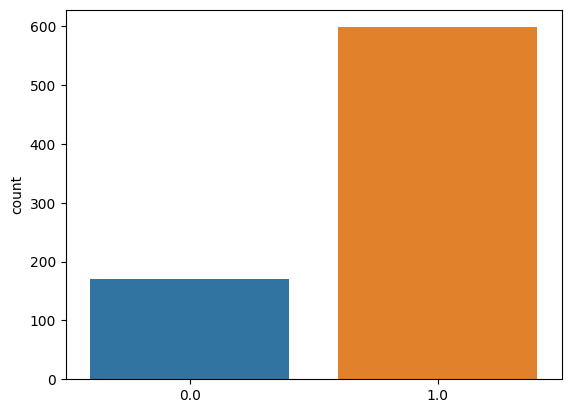

In [33]:
sns.countplot(x = lv_scores)

In [34]:
lv_scores.mean() #77% accuracy

0.7786458333333334

# **DecisionTreeClassifier**

In [35]:
lv = LeaveOneOut()
lv_scores = cross_val_score(DecisionTreeClassifier(),x,y,cv = lv)
lv_scores

array([1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1.

<Axes: xlabel='count'>

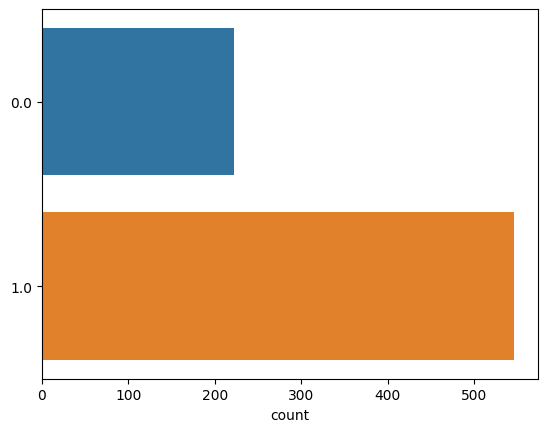

In [36]:
sns.countplot(y = lv_scores)

In [37]:
lv_scores.mean()

0.7109375